# LUNG CANCER DETECTION: DESCRIPTIVE AND PREDICTIVE ANALYSIS

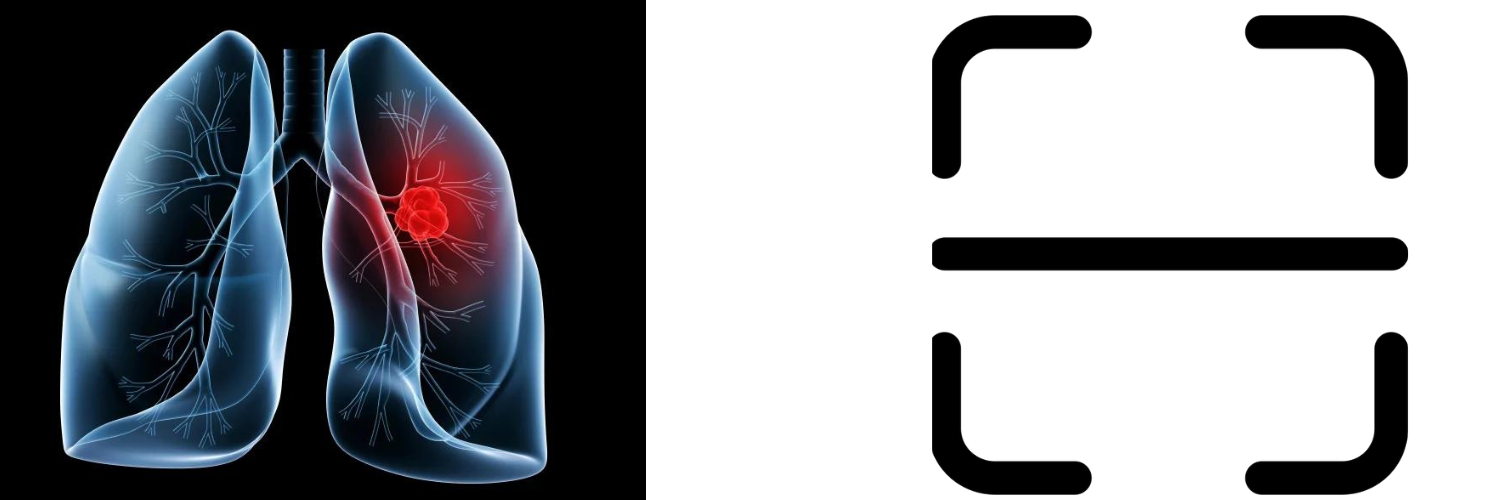

In [1]:
from IPython.display import Image

Image(filename= "https://github.com/M-Gwaza/Python-Projects/blob/main/images/lung_cancer.png")

### About the dataset

* This is a public dataset provided on Kaggle 
* The link: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
        
### Aim
* The aim of this project is to conduct descriptive analysis and then, predictive analysis on the dataset.
       - The type of predictive analysis depends on the column types and data

### Ways to explore the data
* Using statistical power
* Using data visualizations

### Things that were done in this project:
* Wrangling the data
* Showcasing some automated Exploratory data analysis packages
* Seeing which columns affect lung_cancer - exploratory analysis with an interactive chart
* Using Sklearn library packages to develop a decision tree for the prediction
* Explaining the model prediction using gini importance (since the model is a decision tree)
* An interaction dashboard with simple widgets to test the prediction

### About the visuals
* Visuals made using pandas, matplotlib and plotly

In [2]:
# Importing all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "simple_white" # for default template for plotly

# Importing Automated EDA Libraries
#import dtale
import sweetviz as sv
from ydata_profiling import ProfileReport
import mitosheet
import klib


#import panel as pn 
#import hvplot.pandas

# Importing Statistics packages
from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

from ipywidgets import Dropdown, FloatSlider, IntSlider, interact, RadioButtons, SelectionSlider, ToggleButtons

#import dash
#from dash import html, dcc
#from dash.dependencies import Input, Output

# Preparing data

## Importing

In [3]:
# Reading the CSV file using pandas
df = pd.read_csv("https://github.com/M-Gwaza/Python-Projects/blob/main/csv/survey lung cancer.csv")

---
**Note**

All the operations regarding Exploration done in this notebook could be automated using:

- Dtale
- Ydata_profiling
- Sweetviz 
- Mitosheet

Then doing some cleaning using:

- Klib

### Using Dtale

In [4]:
#dtale.show(df)
# This libraries wasn't used because it has supporting libraries that are out of date and creates problems

# The result looks like:
 Image(filename= "https://github.com/M-Gwaza/Python-Projects/blob/main/images/dtale.png")

### Using Ydata_profiling

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file('lung_cancer_EDA_using_ydata_profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**To view the html file made, click here:**
    https://docs.google.com/uc?export=download&id=1cqF9oddb8to9aULuOUoxr0CtKmmHvdd1
    

### Using Sweetviz

In [6]:
report = sv.analyze(df)
report.show_html('lung_cancer_EDA_using_sweetviz.html')

                                             |                                             | [  0%]   00:00 ->…

Report lung_cancer_EDA_using_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**To view the html file made, click here:**
    https://docs.google.com/uc?export=download&id=1jjq5gV3jF8PqN5OgSV7jwfjwc7lYnbLJ


### Using Mitosheet

Used to do some analysis as how it is done using Excel/ Google sheet using Mitosheet

In [7]:
mitosheet.sheet(df, analysis_to_replay="id-gcxecrtgpy")

### Using  klib 

 This is a bit similar to pandas and helps with some cleaning

#### Some of it's functionalities include:

##### klib.describe - functions for visualizing datasets
- klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
- klib.corr_mat(df) # returns a color-encoded correlation matrix
- klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
- klib.dist_plot(df) # returns a distribution plot for every numeric feature
- klib.missingval_plot(df) # returns a figure containing information about missing values

##### klib.clean - functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

In [8]:
klib.cat_plot(df)

GridSpec(6, 2)

In [9]:
klib.missingval_plot(df) # default representation of missing values in a DataFrame, plenty of settings are available

No missing values found in the dataset.


In [10]:
df = klib.data_cleaning(df)

Shape of cleaned data: (276, 16) - Remaining NAs: 0


Dropped rows: 33
     of which 33 duplicates. (Rows (first 150 shown): [99, 100, 117, 199, 212, 223, 256, 275, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-100.0%)



In [11]:
df.shape

(276, 16)

In [12]:
df = klib.clean_column_names(df)

In [13]:
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

In [14]:
klib.dist_plot(df)

<AxesSubplot: xlabel='age', ylabel='Density'>

In [15]:
df  = klib.convert_datatypes(df)

---
Resuming with the normal way of exploring :

In [16]:
# Viewing what the CSV file contains using a DataFrame and it's basic functionalities
print(f"The dataset has {df.shape[0]}  columns and {df.shape[1]} rows \n\nThese are the properties: \n")
print(df.info(), '\n\nSample of the dataset:')
df.head()

The dataset has 276  columns and 16 rows 

These are the properties: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 276 non-null    category
 1   age                    276 non-null    int8    
 2   smoking                276 non-null    int8    
 3   yellow_fingers         276 non-null    int8    
 4   anxiety                276 non-null    int8    
 5   peer_pressure          276 non-null    int8    
 6   chronic_disease        276 non-null    int8    
 7   fatigue                276 non-null    int8    
 8   allergy                276 non-null    int8    
 9   wheezing               276 non-null    int8    
 10  alcohol_consuming      276 non-null    int8    
 11  coughing               276 non-null    int8    
 12  shortness_of_breath    276 non-null    int8    
 13  swallowing_difficulty  2

gender  age  smoking  yellow_fingers  anxiety  peer_pressure  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   chronic_disease  fatigue  allergy  wheezing  alcohol_consuming  coughing  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   shortness_of_breath  swallowing_difficulty  chest_pain lung_cancer  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO

In [17]:
# Checking the number of values in each and every column

print("Number of null values in a column")
df.isnull().sum()

Number of null values in a column


gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

In [18]:
# Printing Unique values for each column

for i in df:
   print(i, df[i].unique())

gender ['M', 'F']
Categories (2, object): ['F', 'M']
age [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
smoking [1 2]
yellow_fingers [2 1]
anxiety [2 1]
peer_pressure [1 2]
chronic_disease [1 2]
fatigue [2 1]
allergy [1 2]
wheezing [2 1]
alcohol_consuming [2 1]
coughing [2 1]
shortness_of_breath [2 1]
swallowing_difficulty [2 1]
chest_pain [2 1]
lung_cancer ['YES', 'NO']
Categories (2, object): ['NO', 'YES']


In [19]:
# Counting number of of unique attributes available
for i in df:
   print(i, "\n",list(df[i].value_counts()), "\nTotal is",  df[i].value_counts().sum(),  "\n")

gender 
 [142, 134] 
Total is 276 

age 
 [18, 16, 16, 16, 15, 15, 14, 14, 11, 10, 10, 10, 9, 9, 9, 9, 8, 7, 6, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1] 
Total is 276 

smoking 
 [150, 126] 
Total is 276 

yellow_fingers 
 [159, 117] 
Total is 276 

anxiety 
 [139, 137] 
Total is 276 

peer_pressure 
 [140, 136] 
Total is 276 

chronic_disease 
 [144, 132] 
Total is 276 

fatigue 
 [183, 93] 
Total is 276 

allergy 
 [151, 125] 
Total is 276 

wheezing 
 [151, 125] 
Total is 276 

alcohol_consuming 
 [152, 124] 
Total is 276 

coughing 
 [159, 117] 
Total is 276 

shortness_of_breath 
 [174, 102] 
Total is 276 

swallowing_difficulty 
 [147, 129] 
Total is 276 

chest_pain 
 [154, 122] 
Total is 276 

lung_cancer 
 [238, 38] 
Total is 276 



In [20]:
# Use 0 and 1 values instead of 1 and 2 for the columns
for i in df:
    df[i] = df[i].replace({1:0, 2:1})

In [21]:
# Change column 'GENDER' values from M or F to 1 or 2 respectively
df["gender"] = df["gender"].map({"M":1, "F":2}).astype(int)

In [22]:
df.select_dtypes('number').columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain'],
      dtype='object')

In [23]:
# Checking multicollinearity
# Seeing the correlation between the columns that influence Lung Cancer using the Correlation Coefficient
corr = df.select_dtypes('number').corr()
corr

gender       age   smoking  yellow_fingers   anxiety  \
gender                 1.000000  0.013120 -0.041131        0.202506  0.152032   
age                    0.013120  1.000000 -0.073410        0.025773  0.050605   
smoking               -0.041131 -0.073410  1.000000       -0.020799  0.153389   
yellow_fingers         0.202506  0.025773 -0.020799        1.000000  0.558344   
anxiety                0.152032  0.050605  0.153389        0.558344  1.000000   
peer_pressure          0.261427  0.037848 -0.030364        0.313067  0.210278   
chronic_disease        0.189925 -0.003431 -0.149415        0.015316 -0.006938   
fatigue                0.079020  0.021606 -0.037803       -0.099644 -0.181474   
allergy               -0.150174  0.037139 -0.030179       -0.147130 -0.159451   
wheezing              -0.121047  0.052803 -0.147081       -0.058756 -0.174009   
alcohol_consuming     -0.434264  0.052049 -0.052771       -0.273643 -0.152228   
coughing              -0.120228  0.168654 -0.138553        0.020803 -0.218843   
shortness_of_breath    0.052893 -0.009189  0.051761       -0.109959 -0.155678   
swallowing_difficulty  0.048959  0.003199  0.042152        0.333349  0.478820   
chest_pain            -0.361547 -0.035806  0.106984       -0.099169 -0.123182   

                       peer_pressure  chronic_disease   fatigue   allergy  \
gender                      0.261427         0.189925  0.079020 -0.150174   
age                         0.037848        -0.003431  0.021606  0.037139   
smoking                    -0.030364        -0.149415 -0.037803 -0.030179   
yellow_fingers              0.313067         0.015316 -0.099644 -0.147130   
anxiety                     0.210278        -0.006938 -0.181474 -0.159451   
peer_pressure               1.000000         0.042893  0.094661 -0.066887   
chronic_disease             0.042893         1.000000 -0.099411  0.134309   
fatigue                     0.094661        -0.099411  1.000000 -0.001841   
allergy                    -0.066887         0.134309 -0.001841  1.000000   
wheezing                   -0.037769        -0.040546  0.152151  0.166517   
alcohol_consuming          -0.132603         0.010144 -0.181573  0.378125   
coughing                   -0.068224        -0.160813  0.148538  0.206367   
shortness_of_breath        -0.214115        -0.011760  0.407027 -0.018030   
swallowing_difficulty       0.327764         0.068263 -0.115727 -0.037581   
chest_pain                 -0.074655        -0.048895  0.013757  0.245440   

                       wheezing  alcohol_consuming  coughing  \
gender                -0.121047          -0.434264 -0.120228   
age                    0.052803           0.052049  0.168654   
smoking               -0.147081          -0.052771 -0.138553   
yellow_fingers        -0.058756          -0.273643  0.020803   
anxiety               -0.174009          -0.152228 -0.218843   
peer_pressure         -0.037769          -0.132603 -0.068224   
chronic_disease       -0.040546           0.010144 -0.160813   
fatigue                0.152151          -0.181573  0.148538   
allergy                0.166517           0.378125  0.206367   
wheezing               1.000000           0.261061  0.353657   
alcohol_consuming      0.261061           1.000000  0.198023   
coughing               0.353657           0.198023  1.000000   
shortness_of_breath    0.042289          -0.163370  0.284968   
swallowing_difficulty  0.108304          -0.000635 -0.136885   
chest_pain             0.142846           0.310767  0.077988   

                       shortness_of_breath  swallowing_difficulty  chest_pain  
gender                            0.052893               0.048959   -0.361547  
age                              -0.009189               0.003199   -0.035806  
smoking                           0.051761               0.042152    0.106984  
yellow_fingers                   -0.109959               0.333349   -0.099169  
anxiety                          -0.155678               0.478820   -0

In [24]:
# Plotting a heatmat to show the correlation
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap= "Blues");

In [25]:
#(df["LUNG_CANCER"].map({"YES":1, "NO":0}).astype(int))

In [26]:
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 276 non-null    int32   
 1   age                    276 non-null    int8    
 2   smoking                276 non-null    int8    
 3   yellow_fingers         276 non-null    int8    
 4   anxiety                276 non-null    int8    
 5   peer_pressure          276 non-null    int8    
 6   chronic_disease        276 non-null    int8    
 7   fatigue                276 non-null    int8    
 8   allergy                276 non-null    int8    
 9   wheezing               276 non-null    int8    
 10  alcohol_consuming      276 non-null    int8    
 11  coughing               276 non-null    int8    
 12  shortness_of_breath    276 non-null    int8    
 13  swallowing_difficulty  276 non-null    int8    
 14  chest_pain             276 non-null    int

In [28]:
LUNG_CANCER_VS_YELLOW_FINGERS = (df["lung_cancer"].map({"YES":1, "NO":0}).astype(int)).corr(df['yellow_fingers'])
LUNG_CANER_VS_ANXIETY         = (df["lung_cancer"].map({"YES":1, "NO":0}).astype(int)).corr(df['anxiety'])

In [29]:
# Removing multicollinearity columns

LUNG_CANCER_VS_YELLOW_FINGERS = (df["lung_cancer"].map({"YES":1, "NO":0}).astype(int)).corr(df['yellow_fingers'])
LUNG_CANER_VS_ANXIETY         = (df["lung_cancer"].map({"YES":1, "NO":0}).astype(int)).corr(df['anxiety'])

print("LUNG_CANCER vs YELLOW_FINGERS: ", round(LUNG_CANCER_VS_YELLOW_FINGERS, 2))
print("LUNG_CANCER vs ANXIETY       : ", round(LUNG_CANER_VS_ANXIETY, 2))

LUNG_CANCER vs YELLOW_FINGERS:  0.19
LUNG_CANCER vs ANXIETY       :  0.14


In [30]:
# Removing the column 'ANXIETY' since it is also the leaky column - a post condition to happen after having lung cancer
df.drop(columns=["anxiety"], inplace = True)

In [31]:
#The remaining columns are now
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'peer_pressure',
       'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

In [32]:
# Seeing class distribution of people with Lung cancer against those without

#pivot = df
majority_class_prop, minority_class_prop = df["lung_cancer"].value_counts()
print(f"Major class proposition is {majority_class_prop} \n\nMinor class proposition is {minority_class_prop}")



Major class proposition is 238 

Minor class proposition is 38


In [33]:
# Using a bar chart to showcase the majority and minority classes percentages

df["lung_cancer"].value_counts(normalize=True).plot(
    kind = "bar", xlabel = "Class", ylabel="Relative Frequency", title="Class Balance", grid=True, figsize = (15,5)
);

## Plotting a bar graph to compare your columns against Lung_cancer

Things to note:
    
    1. This only compares Lung cancer if yes or not to the columns where the conditions are TRUE/1 
        - e.g. when LUNG_CANCER is TRUE  (YES) and SMOKING is 1 ('YES')
                    LUNG_CANCER is FALSE (NO)  and SMOKING is 1 ('YES')
    2. This is plotted using plotly canvas to give a user power to interact with the graph using a dropdown
    

In [34]:
df1 = df.drop(columns = 'age')

fig = go.Figure()

for column in df1.columns.to_list():
    fig.add_trace(go.Bar(x = df1.lung_cancer,  y = df1[column], name= column,
        )
    )
    
fig.update_layout(
    title = 'Pick your choice column to compare the count against Lung Cancer',
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True, True,True,True,True,True,True,True,True,True,True,True,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs ALL COLUMNS]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Gender',
                  method = 'update',
                  args = [{'visible': [True, False, False,False,False,False,False,False,False,False,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs GENDER]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Smoking',
                  method = 'update',
                  args = [{'visible': [False, True, False,False,False,False,False,False,False,False,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs SMOKING]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Yellow_fingers',
                  method = 'update',
                  args = [{'visible': [False, False, True,False,False,False,False,False,False,False,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs YELLOW FINGERS]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Peer_pressure',
                  method = 'update',
                  args = [{'visible': [False, False, False,True,False,False,False,False,False,False,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs PEER PRESSURE]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Chronic_disease',
                  method = 'update',
                  args = [{'visible': [False, False, False,False,True,False,False,False,False,False,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs CHRONIC DISEASE]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Fatigue',
                  method = 'update',
                  args = [{'visible': [False, False, False,False,False,True,False,False,False,False,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs FATIGUE]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Allergy',
                  method = 'update',
                  args = [{'visible': [False, False, False,False,False,False,True,False,False,False,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs ALLERGY]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Wheezing',
                  method = 'update',
                  args = [{'visible': [False, False, False,False,False,False,False,True,False,False,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs WHEEZING]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Alcohol_consuming',
                  method = 'update',
                  args = [{'visible': [False, False, False,False,False,False,False,False,True,False,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs ALCOHOL CONSUMIN]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Coughing',
                  method = 'update',
                  args = [{'visible': [False, False, False,False,False,False,False,False,False,True,False,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs COUGHING]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Shortness_of_breath',
                  method = 'update',
                  args = [{'visible': [False, False, False,False,False,False,False,False,False,False,True,False,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs SHORTNESS OF BREATH]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Swallowing_difficulty',
                  method = 'update',
                  args = [{'visible': [False, False, False,False,False,False,False,False,False,False,False,True,False,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs SWALLOWING DIFFICULTY]',
                          'showlegend': True}
                         
                         ]
                 
                 ),
             dict(label = 'Chest_pain',
                  method = 'update',
                  args = [{'visible': [False, False, False,False,False,False,False,False,False,False,False,False,True,False]},
                          {'title' : 'Comparison between [LUNG_CANCER vs CHEST PAIN]',
                          'showlegend': True}
                         
                         ]
                 
                 )
                
            ]
        
        )
    
    )]

)
    
    


fig.show()

In [35]:
#a = (df[df['LUNG_CANCER'] == 'NO'])['SMOKING'].value_counts()
#print(a)
#plt.bar(a.index, a.values, width= 0.1)

In [36]:
#pivot.WHEEZING

In [37]:
for i in df.drop(columns=['age', 'lung_cancer']):
    print(f"For {i}: ", df[df[i] == 1]['lung_cancer'].value_counts(), "\n\n")

For gender:  YES    125
NO      17
Name: lung_cancer, dtype: int64 


For smoking:  YES    131
NO      19
Name: lung_cancer, dtype: int64 


For yellow_fingers:  YES    146
NO      13
Name: lung_cancer, dtype: int64 


For peer_pressure:  YES    130
NO      10
Name: lung_cancer, dtype: int64 


For chronic_disease:  YES    131
NO      13
Name: lung_cancer, dtype: int64 


For fatigue:  YES    165
NO      18
Name: lung_cancer, dtype: int64 


For allergy:  YES    146
NO       5
Name: lung_cancer, dtype: int64 


For wheezing:  YES    142
NO       9
Name: lung_cancer, dtype: int64 


For alcohol_consuming:  YES    145
NO       7
Name: lung_cancer, dtype: int64 


For coughing:  YES    149
NO      10
Name: lung_cancer, dtype: int64 


For shortness_of_breath:  YES    153
NO      21
Name: lung_cancer, dtype: int64 


For swallowing_difficulty:  YES    124
NO       5
Name: lung_cancer, dtype: int64 


For chest_pain:  YES    142
NO      12
Name: lung_cancer, dtype: int64 




In [38]:
# Value counts that are not normalized
from statistics import mean
majority_class_prop, minority_class_prop = df["lung_cancer"].value_counts()
middle_class_prop = mean(df["lung_cancer"].value_counts())
print(majority_class_prop, middle_class_prop, minority_class_prop)

238 138 38


## Building the Model to predict Lung Cancer

The Machine Learning workflow

1. Data Preparation
    - import
    - explore
    - split

2. Building a Model
    - baseline
    - iterate
    - evaluate

3. Results communication

### Split

Splitting the Dataframe into feature matrix and target vector



In [39]:
target = "lung_cancer"
X = df.drop(columns = target)
y = df[target]

In [40]:
print("The feature matrix shape is: ", X.shape, "\nAnd it looks like: ")
X.head(3)

The feature matrix shape is:  (276, 14) 
And it looks like: 


gender  age  smoking  yellow_fingers  peer_pressure  chronic_disease  \
0       1   69        0               1              0                0   
1       1   74        1               0              0                1   
2       2   59        0               0              1                0   

   fatigue  allergy  wheezing  alcohol_consuming  coughing  \
0        1        0         1                  1         1   
1        1        1         0                  0         0   
2        1        0         1                  0         1   

   shortness_of_breath  swallowing_difficulty  chest_pain  
0                    1                      1           1  
1                    1                      1           1  
2                    1                      0           1

In [41]:
print("The target vector shape is: ", y.shape, "\nAnd it looks like: ")
y.head(5)

The target vector shape is:  (276,) 
And it looks like: 


0    YES
1    YES
2     NO
3     NO
4     NO
Name: lung_cancer, dtype: category
Categories (2, object): ['NO', 'YES']

### Splitting the data into Training, testing and validating data

Performing a randomized train-test split using sklearn 
 - with 'random_state' factor as 42 to always get the same results when rerunned


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y , test_size=0.2, random_state=42
)

In [43]:
# Creating a validation list for the validating the results from testing before training new data

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2 , random_state=42
)

In [44]:
y_train.shape

(176,)

# Build Model

## Baseline

Use Accuracy score is the baseline since the whole dataset is filled with categorical values

In [45]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.89


### Iterate

- Building a Model using a decision tree
- Would have used OrdinalEncoding but the columns have already been changed from categorical

In [46]:
# Build Model
model = make_pipeline(
   DecisionTreeClassifier(random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [47]:
# Calculating the training and validation accuracy scores

acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val) # same as above - another way

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 0.91


How the model performed:
- Both of them performed very good and are near 100%
- They both also beat the Baseline

Next step:

- The tree depth then has to be checked that is, number of leafs a value uses to gain purity

In [48]:
# Looking at the tree depth

tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 9


- The depth is actually very good but further checks still have to be made

### Hyperparameter Tuning

- A range has to be set inorder to try to get the scores and compare with the baseline as well as when Tree depth is 9

In [49]:
depth_hyperparams = range(1, 10, 1)


In [50]:
list(depth_hyperparams)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [51]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        DecisionTreeClassifier(max_depth= d, random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))


print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.8920454545454546, 0.8977272727272727, 0.9261363636363636]
Validation Accuracy Scores: [0.8409090909090909, 0.8409090909090909, 0.8636363636363636]


- The results are now above the baseline but below the scores when the tree depth was 9

In [52]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(depth_hyperparams), y=training_acc,
                    mode='lines+markers',
                    name='training_acc'))
fig.add_trace(go.Scatter(x=list(depth_hyperparams), y=validation_acc,
                    mode='lines+markers',
                    name='validation_acc'))
#fig.add_trace(go.Scatter(x=random_x, y=random_y2,
 #                   mode='markers', name='markers'))

    
fig.update_layout(hovermode = 'x unified', title = " Comparison between [training_acc] and [validation_acc]<br><br><sup>To find where they intersect</sup>", )

fig.show()

- From this point, it is better to proceed with when tree depth was 9
- Time to rebuild the model again as how it was

In [53]:
# Build Model
model = make_pipeline(
     DecisionTreeClassifier(max_depth=9, random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=9, random_state=42))])

In [54]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 0.91


In [55]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.89


### Communicating results

As indicated above, the model would then be interpreted using gini importance (the measure of impurity)

### 1. Plotting - The Decision Tree

In [56]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

From the tree:

    - Each node as 4 pieces of information to show how the split was made
    - Gini importance ie measure of impurity trying to get to zero
    - the remaining parts indicating how many samples remaining starting from 100%

### 2- Plotting -  Funnel Chart

- To showcase how the features against their respective Gini Impurity

Firstly getting the values:
    
    - features
    - Importances

In [57]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:\n", features, '\n\n')
print("Importances\n:", importances)

Features:
 Index(['gender', 'age', 'smoking', 'yellow_fingers', 'peer_pressure',
       'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain'],
      dtype='object') 


Importances
: [0.05900101 0.32572935 0.0472008  0.15672266 0.0413007  0.1153686
 0.08396297 0.02793608 0.         0.09677414 0.0354006  0.01060308
 0.         0.        ]


- Placing the values into a Series

In [58]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.head()

wheezing                 0.000000
swallowing_difficulty    0.000000
chest_pain               0.000000
shortness_of_breath      0.010603
allergy                  0.027936
dtype: float64

In [59]:
feat_imp.sort_values(ascending = False)

age                      0.325729
yellow_fingers           0.156723
chronic_disease          0.115369
alcohol_consuming        0.096774
fatigue                  0.083963
gender                   0.059001
smoking                  0.047201
peer_pressure            0.041301
coughing                 0.035401
allergy                  0.027936
shortness_of_breath      0.010603
wheezing                 0.000000
swallowing_difficulty    0.000000
chest_pain               0.000000
dtype: float64

In [60]:
funnel = feat_imp.sort_values(ascending = False)
list(funnel.values)

[0.32572935048669227,
 0.15672265799512686,
 0.11536860134600269,
 0.09677414132802192,
 0.08396296964852117,
 0.05900100569896077,
 0.047200804559168606,
 0.041300703989272554,
 0.03540060341937644,
 0.027936082243826113,
 0.010603079285030645,
 0.0,
 0.0,
 0.0]

In [61]:
import plotly.io as pio
pio.templates.default = "simple_white"

from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = list(funnel.index),
    x = list(funnel.values),
    #textposition = "inside",
    #textinfo = "value+percent initial",
    opacity = 0.95, marker = {"color": ["deepskyblue","teal", "lightsalmon", "tan",  "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}
                             },
    connector = {"line": {"color": "royalblue", "dash": "dot"}}
)
)

fig.update_layout(
    title="Funnel Chart showing the Gini Impurity",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="RebeccaPurple"
    )
)

fig.show()

### 3 - Plotting - Column Chart 

In [62]:
list(funnel.values)

[0.32572935048669227,
 0.15672265799512686,
 0.11536860134600269,
 0.09677414132802192,
 0.08396296964852117,
 0.05900100569896077,
 0.047200804559168606,
 0.041300703989272554,
 0.03540060341937644,
 0.027936082243826113,
 0.010603079285030645,
 0.0,
 0.0,
 0.0]

In [63]:
#fig = px.bar(df, x="total_bill", y="day", orientation='h')
#fig.show()

funnel = feat_imp.sort_values(ascending = True)

fig = px.bar(funnel,orientation='h', text=funnel.values)

fig.update_layout(
    
    showlegend=False,
    title=dict(text="Column Chart showing the Gini Impurity", font_color="purple"),
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="RebeccaPurple"
    )
)

fig.update_xaxes(visible=False )
fig.update_yaxes(title=None)

fig.show()

## Building interactive predictive widget for the model

In this section, a user is given power to make a prediction of the built model

In [64]:
list(X_train.columns)

['gender',
 'age',
 'smoking',
 'yellow_fingers',
 'peer_pressure',
 'chronic_disease',
 'fatigue',
 'allergy',
 'wheezing',
 'alcohol_consuming',
 'coughing',
 'shortness_of_breath',
 'swallowing_difficulty',
 'chest_pain']

In [65]:
# The prediction function

def make_prediction(
    gender, age, smoking, yellow_fingers, peer_pressure, chronic_disease, fatigue, 
    allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain):
    data = {
        "gender" : gender,
        "age" : age,
        "smoking" : smoking,
        "yellow_fingers" : yellow_fingers,
        "peer_pressure" : peer_pressure,
        "chronic_disease" : chronic_disease,
        "fatigue" : fatigue,
        "allergy" : allergy,
        "wheezing" : wheezing,
        "alcohol_consuming" : alcohol_consuming,
        "coughing" : coughing,
        "shortness_of_breath" : shortness_of_breath,
        "swallowing_difficulty" : swallowing_difficulty,
        "chest_pain" : chest_pain,
      
    }
    
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df)[0]
    
    return f"Lung Cancer state: ${prediction}"

In [66]:
make_prediction

<function __main__.make_prediction(gender, age, smoking, yellow_fingers, peer_pressure, chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain)>

In [67]:
# 1- Testing the prediction
make_prediction(69,0,0,0,0,0,1,0,1,1,0,1,0,0)

'Lung Cancer state: $NO'

In [68]:
# 1- Testing the prediction
make_prediction(69,0,0,0,0,0,1,0,1,1,0,1,0,0)

'Lung Cancer state: $NO'

In [69]:
# 2- Testing the prediction
make_prediction(71,0,1,0,0,0,0,0,1,1,0,1,0,0)

'Lung Cancer state: $YES'

In [70]:
# 3- Testing the prediction
make_prediction(50,0,0,1,0,0,1,0,1,1,0,1,0,0)

'Lung Cancer state: $NO'

In [71]:
# Building interactive dashboard for easier [UI] for users to use the predictive model

print ("ENTER YOUR VALUES:")

interact(
    make_prediction,
    age = IntSlider(
        min=X_train["age"].min(),
        max=X_train["age"].max(),
        value=X_train["age"].mean(),
    ),
    gender = ToggleButtons(options=sorted(X_train["gender"].unique())),
    swallowing_difficulty = ToggleButtons(options=sorted(X_train["swallowing_difficulty"].unique())),
    allergy = ToggleButtons(options=sorted(X_train["allergy"].unique())),
    alcohol_consuming = ToggleButtons(options=sorted(X_train["alcohol_consuming"].unique())),
    fatigue = ToggleButtons(options=sorted(X_train["fatigue"].unique())),
    coughing = ToggleButtons(options=sorted(X_train["coughing"].unique())),
    yellow_fingers = ToggleButtons(options=sorted(X_train["yellow_fingers"].unique())),
    chest_pain = ToggleButtons(options=sorted(X_train["chest_pain"].unique())),
    peer_pressure = ToggleButtons(options=sorted(X_train["peer_pressure"].unique())),
    shortness_of_breath = ToggleButtons(options=sorted(X_train["shortness_of_breath"].unique())),
    chronic_disease = ToggleButtons(options=sorted(X_train["chronic_disease"].unique())),
    wheezing = ToggleButtons(options=sorted(X_train["wheezing"].unique())),
    smoking = ToggleButtons(options=sorted(X_train["smoking"].unique()))
 

    
);

ENTER YOUR VALUES:


interactive(children=(ToggleButtons(description='gender', options=(1, 2), value=1), IntSlider(value=62, descri…

Note:
 - This was the current **static** state for the notebook
 - The display was:

In [72]:
Image(filename= "https://github.com/M-Gwaza/Python-Projects/blob/main/images/prediction.png")

### CONCLUSION 
- The major factors that influence lung cancer found from the prediction model are: Age, Swallowing difficulty, Allergy, Alcohol consuming and Fatigue
- Wheezing and Gender has little to no effect with Lung cancer

### Further exploration
- Taking a look at age as it plays a major role in the prediction

In [73]:
print(f"The minimum age is {df['age'].min()} and the maximum age is {df['age'].max()} ")

The minimum age is 21 and the maximum age is 87 


In [74]:
age = df['age'].value_counts()

In [75]:
fig = px.pie( values=age.values , names=age.index, title = 'Age Count')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

''

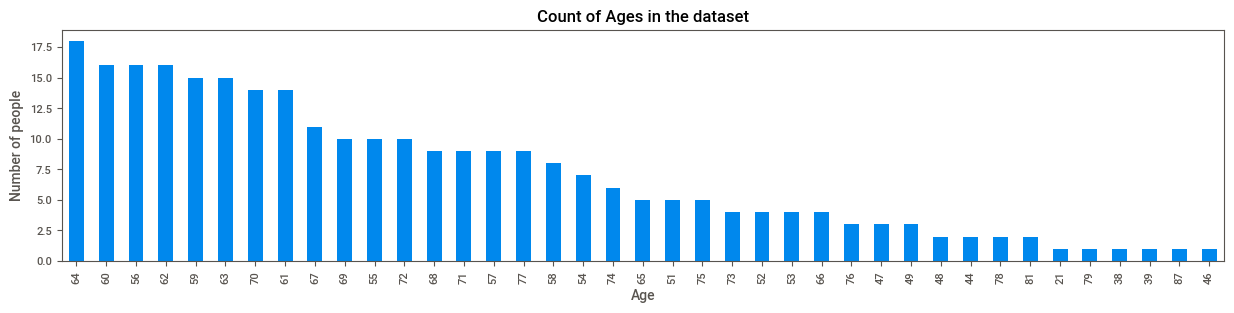

In [76]:
df['age'].value_counts().plot(
    kind='bar', figsize=(15, 3),
    xlabel = 'Age',
    ylabel = 'Number of people',
    title = 'Count of Ages in the dataset'),
    

;

 - From this, it is observed that the ages count vary alot
 - Those that were available in the dataset were of age range around 60s to 70s